# Web Scraping La Vanguardia 📰

In this notebook we are going to use BeautifulSoup to scrape an article from a local newspaper. Then we'll dive in to analyzing the article using the Natural Language ToolKit (nltk). In the process, we'll apply important techniques of Natural Language Processing (NLP) such as tokenization and stopwords.

In [1]:
# Importing the libraries to scrape the article
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time

In [2]:
# Defining the url
url = 'https://www.lavanguardia.com/vida/20210308/6265433/8m-dia-internacional-mujer-2021-huelga-manifestacion-madrid-barcelona-ultimas-noticias-hoy-en-directo.html'

In [3]:
# Pass the url to the requests library to get the page content 
page = requests.get(url)
page, page.content

(<Response [200]>,
 b'<!DOCTYPE html>\n<html lang="es">    <head>\n        <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n                                \n                        \n                                    \n    <!-- Article metatags -->\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/>\n<meta name="description" content="8 de marzo, D\xc3\xada de la Mujer: Noticias en directo sobre las manifestaciones, concentraciones y actos convocados en las principales ciudades de Espa\xc3\xb1a" />\n<meta name="title" content="D\xc3\xada de la Mujer | Concentraciones y manifestaciones por el 8M en las ciudades, en directo" />\n<meta name="Keywords" content="8m dia internacional mujer 2021 huelga manifestacion madrid barcelona ultimas noticias hoy en directo" />\n<meta name="news_keywords" content="8m dia internacional mujer 2021 huelga manifestacion madrid barcelona ultimas noticias hoy en directo" />\n<meta name="robots" content="index, follow" />\

In [4]:
# Creating a BeautifulSoup object with html5lib parser
soup = BeautifulSoup(page.content, 'html5lib')
type(soup), soup

(bs4.BeautifulSoup, <!DOCTYPE html>
 <html lang="es"><head>
         <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
                                 
                         
                                     
     <!-- Article metatags -->
 <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
 <meta content="8 de marzo, Día de la Mujer: Noticias en directo sobre las manifestaciones, concentraciones y actos convocados en las principales ciudades de España" name="description"/>
 <meta content="Día de la Mujer | Concentraciones y manifestaciones por el 8M en las ciudades, en directo" name="title"/>
 <meta content="8m dia internacional mujer 2021 huelga manifestacion madrid barcelona ultimas noticias hoy en directo" name="Keywords"/>
 <meta content="8m dia internacional mujer 2021 huelga manifestacion madrid barcelona ultimas noticias hoy en directo" name="news_keywords"/>
 <meta content="index, follow" name="robots"/>
 <meta content="La Vanguardia S.A

In [5]:
# Using the html element to call items 
soup.h1

<h1 class="title">Día de la Mujer | Concentraciones y manifestaciones por el 8M en las ciudades, en directo</h1>

### Now we are going to the article page and use the inspector to decide what we want to look at

In [6]:
# Getting all the text from the article 
article = soup.find_all('p')
len(article)

217

In [7]:
# Looping through all items with text from the article and print everything
for item in article: 
    print(item.get_text())


                        Sociedad
                    
Día de la Mujer | Concentraciones y manifestaciones por el 8M en las ciudades, en directo 
Pere Millan

					
						22:00
					
					FIN DEL DIRECTO ❌ | Aquí ponemos punto y final a esta cobertura en directo de las distintas manifestaciones e iniciativas por el Día Internacional de la Mujer, este año marcadas inevitablemente por la pandemia. Se han realizado manifestaciones con distancias de seguridad en distintos puntos de la geografía española, mientras que en Madrid pequeñas concentraciones espontáneas han sorteado la prohibición del gobierno autonómico y los jueces. Más información: 
Sánchez promete acelerar su agenda feminista frente al “machismo descarnado” de Vox

¡Qué pasen buenas noches!
				

					
						21:55
					
					Esta mañana también ha tenido lugar una concentración en la céntrica plaza de la capital impulsada por el Sindicato de Estudiantes, si bien la de esta noche es mucho más escasa. Las concentradas se han co

In [8]:
# Convert the article into a string of text
text = " ".join([item.get_text() for item in article])
text

'\n                        Sociedad\n                     Día de la Mujer | Concentraciones y manifestaciones por el 8M en las ciudades, en directo\xa0 Pere Millan \n\t\t\t\t\t\n\t\t\t\t\t\t22:00\n\t\t\t\t\t\n\t\t\t\t\tFIN DEL DIRECTO ❌ | Aquí ponemos punto y final a esta cobertura en directo de las distintas manifestaciones e iniciativas por el Día Internacional de la Mujer, este año marcadas inevitablemente por la pandemia. Se han realizado manifestaciones con distancias de seguridad en distintos puntos de la geografía española, mientras que en Madrid pequeñas concentraciones espontáneas han sorteado la prohibición del gobierno autonómico y los jueces. Más información: \nSánchez promete acelerar su agenda feminista frente al “machismo descarnado” de Vox\n\n¡Qué pasen buenas noches!\n\t\t\t\t \n\t\t\t\t\t\n\t\t\t\t\t\t21:55\n\t\t\t\t\t\n\t\t\t\t\tEsta mañana también ha tenido lugar\xa0una concentración en la céntrica plaza de la capital impulsada por el Sindicato de Estudiantes, si bi

In [9]:
# We can also get all the links that can be found on the article's page
all_links = soup.find_all('a')

for link in all_links:
    print(link.get('href'))

https://www.lavanguardia.com/vida/20210311/6299730/coronavirus-espana-restricciones-semana-santa-vacuna-janssen-contagios-fallecidos-ultimas-noticias-hoy-en-directo.html
https://www.lavanguardia.com/local/madrid/20210311/6299421/comunidad-madrid-elecciones-asamblea-mocion-de-censura-ultimas-noticias-hoy-en-directo.html
https://www.lavanguardia.com/local/20210311/6299729/restricciones-catalunya-barcelona-girona-lleida-tarragona-ultimas-noticias-11-marzo-hoy-en-directo.html
https://www.lavanguardia.com/loterias/20210310/6274053/sorteos-once-miercoles-10-marzo-2021-resultados-loterias-sorteo.html
https://www.lavanguardia.com/loterias/20210310/6274546/bonoloto-miercoles-10-marzo-2021-resultados-loterias-sorteo-bote.html
https://www.lavanguardia.com/local/valencia/20210310/6297656/ana-martinez-vidal-valenciana-presidira-gobierno-murcia.html
https://www.lavanguardia.com/economia/20210310/6296151/sepe-cita-previa-demanda-paro-renovar-empleo-web-tramites.html
https://www.lavanguardia.com/vida/

### We will now extract words from our Text with NLP
We'll now use <code>nltk </code>, the Natural Language Toolkit, to

1. Tokenize the text (splitting into tokens, such as words)

2. Remove stopwords (words such as 'a' and 'la' that occur a great deal in ~ nearly all Spanish texts).

In [10]:
# Importing tokenization libraries
import re
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')

In [11]:
# Find the first 5 tokens of our article
tokens = tokenizer.tokenize(text)
tokens[:5]

['Sociedad', 'Día', 'de', 'la', 'Mujer']

In [12]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

# Print several items from list to double-check
words[:8]

['sociedad',
 'día',
 'de',
 'la',
 'mujer',
 'concentraciones',
 'y',
 'manifestaciones']

### Removing stop words

It is common practice to remove words that appear alot in the Spanish language such as 'a', 'el' and 'de' (known as stopwords) because they're not relevant in our NLP analysis.

In [13]:
# Import nltk
import nltk

# Get Spanish stopwords and print some of them
sw = nltk.corpus.stopwords.words('spanish')
sw[:5] #the first 5 stopwords

['de', 'la', 'que', 'el', 'en']

In [14]:
## Let's remove the stop words from our token

# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:5]

['sociedad', 'día', 'mujer', 'concentraciones', 'manifestaciones']

### Removing punctuations and strange characters

In [15]:
from nltk.tokenize import word_tokenize

# Removing all tokens that are not alphabetic
words = [word for word in words_ns if word.isalpha()] 
print(words[:100])
len(words)

['sociedad', 'día', 'mujer', 'concentraciones', 'manifestaciones', 'ciudades', 'directo', 'pere', 'millan', 'fin', 'directo', 'aquí', 'ponemos', 'punto', 'final', 'cobertura', 'directo', 'distintas', 'manifestaciones', 'iniciativas', 'día', 'internacional', 'mujer', 'año', 'marcadas', 'inevitablemente', 'pandemia', 'realizado', 'manifestaciones', 'distancias', 'seguridad', 'distintos', 'puntos', 'geografía', 'española', 'mientras', 'madrid', 'pequeñas', 'concentraciones', 'espontáneas', 'sorteado', 'prohibición', 'gobierno', 'autonómico', 'jueces', 'información', 'sánchez', 'promete', 'acelerar', 'agenda', 'feminista', 'frente', 'machismo', 'descarnado', 'vox', 'pasen', 'buenas', 'noches', 'mañana', 'lugar', 'concentración', 'céntrica', 'plaza', 'capital', 'impulsada', 'sindicato', 'estudiantes', 'si', 'bien', 'noche', 'escasa', 'concentradas', 'colocado', 'frente', 'real', 'casa', 'correos', 'círculo', 'coreado', 'consignas', 'aquí', 'feministas', 'madrid', 'tumba', 'machismo', 'tranq

4369

### Creating a frequency histogram to see the most used words in the article

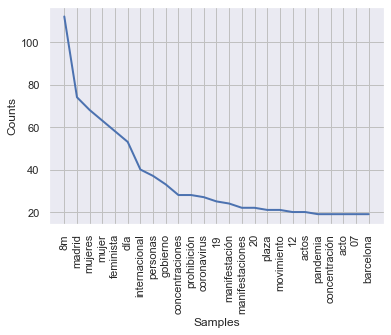

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)